## Diabetes Prediction

In [1]:
#@ Importing Libraries and Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### Data Collection and Preprocessing

In [2]:
#@ Loading the data from excel file to pandas dataframe
data = pd.read_excel('dataset.xlsx')
#@ Print the first 5 rows of the dataframe
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#@ Finding the number of rows and columns in the dataset
print("The shape of the data is:",data.shape)

The shape of the data is: (768, 9)


In [4]:
#@ Getting the statistical measures of the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\Python10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

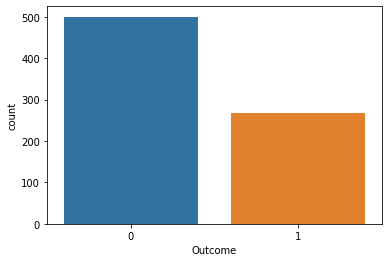

In [6]:
sns.countplot(data['Outcome'], label = "Count")

#### Here, we got that:
- 500 people are non diabetic, and 
- 268 people are diabetic

<AxesSubplot:title={'center':'Pearson Corrrelation of the Features'}>

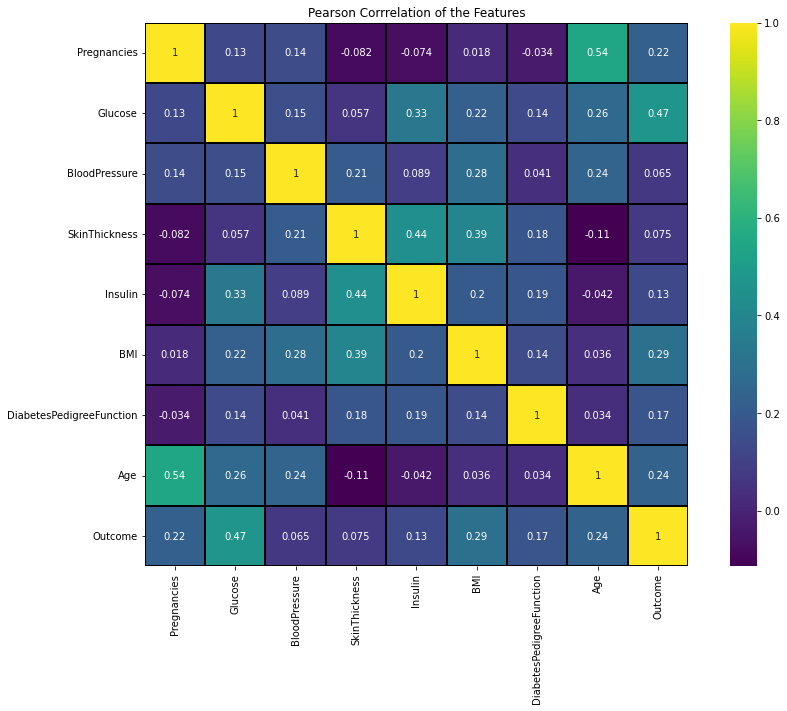

In [7]:
plt.figure(figsize=(15,10))
colormap = plt.cm.viridis
plt.title('Pearson Corrrelation of the Features')
sns.heatmap(data.corr(), cmap=colormap, annot=True, linewidths=0.1, vmax=1.0, 
            square=True, linecolor='black')

In [8]:
#@ Seperating features and target
X = data.drop(columns = 'Outcome', axis = 1)
y = data['Outcome']

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [11]:
#@ Data Standardization
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [12]:
X = standardized_data
y = data['Outcome']
print(X)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [13]:
#@ train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### Training the Model

- For training the model, here we are using Support Vector Machine (SVM) algorithm.

In [14]:
#@ Support Vector Machine Classifier
classifier = svm.SVC(kernel = 'linear')
#@ Training the SVM Classifier with training data
classifier.fit(X_train, y_train)

SVC(kernel='linear')

### Model Evaluation

In [15]:
#@ Predicting Accuracy on training data
X_train_prediction = classifier.predict(X_train)

#@ Using Accuracy Score for finding accuracy
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print("The accuracy score on training data is:",training_data_accuracy)

The accuracy score on training data is: 0.7719869706840391


In [16]:
#@ Predicting Accuracy on test data
X_test_prediction = classifier.predict(X_test)

#@ Using Accuracy Score for finding accuracy
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("The accuracy score on test data is:",test_data_accuracy)

The accuracy score on test data is: 0.7662337662337663


- When model is overfitted, our training data accuracy will be very high, test data accuracy will be very low. But, here both test & trained data are around similar accuracy. So, we can say that our model is now ready !

## Building a Predictive System

In [17]:
input_data = (1,85,66,29,0,26.6,0.351,31
)
#@ change the data into numpy array
input_data_as_np_array = np.asarray(input_data)
#@ reshape the array
input_data_reshaped = input_data_as_np_array.reshape(1, -1)
#@ standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
#@ now, predicting
prediction = classifier.predict(std_data)
print(prediction)

[[-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]]
[0]


C:\Python10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
if(prediction[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

The person is not diabetic
